# Assignment 8
- The function at the end to reconstruct the image is commented out. Before running it ensure that the respective files are uploaded.
- In this assignment, we need to write code for reconstructing an image using the Delay-and-Sum (DAS)
algorithm that is commonly used in Ultrasound image reconstruction.

In [163]:
# All the Imports
import numpy as np
import matplotlib.pyplot as plt

- We first start by setting up the no. of mics and the source position along with the mics' position on the y-axis.
-  We also define the no. of samples, Speed of wave, distance per sample as well as time per sample here.

In [164]:
# Main system parameters: number of mics, number of samples in time
Nmics = 9
Nsamp = 100

# Source: x,y coordinates: x: 0+, y: [-Y, +Y] where Y determined by
#     pitch and Nmics
src = (0, 0)

# Spacing between microphones
pitch = 0.1
# proxy for sampling rate
dist_per_samp = 0.1
# Speed of sound in the medium
C = 0.5
time_per_sample = dist_per_samp/C

# CODE Locations of microphones
def put_nmics(Nmics, pitch):
  y1 = []
  if Nmics % 2 == 0:
    for element in range(-int(Nmics/2), int(Nmics/2)):
      y1.append(pitch/2 + element*pitch)
  else:
    for element in range(-int(Nmics/2), int((Nmics+1)/2)):
      y1.append(element*pitch)
  x1 = [0] * len(y1)
  loc = np.array([x1,y1])
  loc = loc.transpose()
  return loc

# Location of point obstacle
obstacle = (3, -1)


## Generating the Source Wave
- Here, we make a time array and make use the wsrc function provided by sir to form the source wave.
- I have modified the source wave function to take the SincP value as a paramter.

In [165]:
# Source sound wave - time axis and wave
# sinc wave with narrowness determined by parameter
# CODE Nsamp time instants with spacing of dist_per_samp
t = np.linspace(0, Nsamp*time_per_sample, Nsamp)
def wsrc(t, SincP):
  return np.sinc(SincP*t)

### Plots for the Questions Given
- I have commented out the code for plotting but the plots are available in the report file.
- Here SincP is the dialation factor. Changing it determines how narrow or broad the graph is going to be.
- Thus by changing SincP we can get different plots.

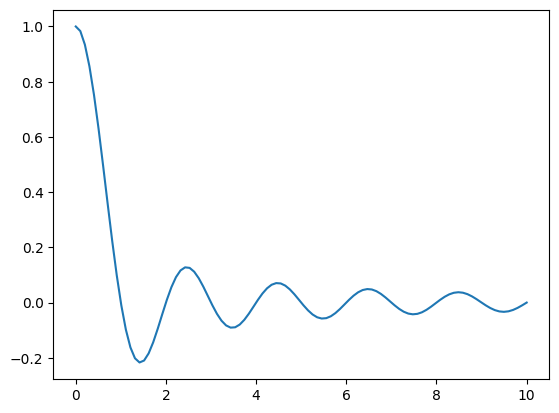

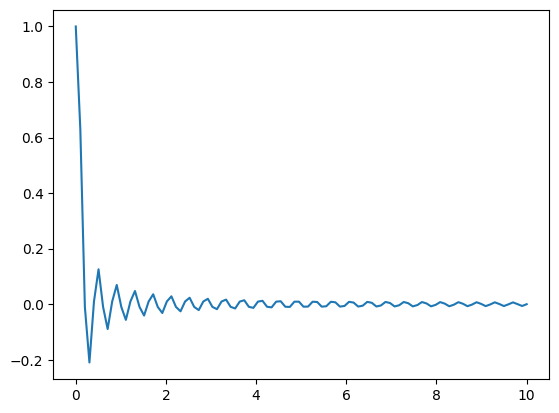

In [166]:
Nmics = 8
Nsamp = 100
# proxy for sampling rate
dist_per_samp = 0.1
# Speed of sound in the medium
C = 1
time_per_sample = dist_per_samp/C

t = np.linspace(0, Nsamp*time_per_sample, Nsamp)
plt.figure()
# Here Sincp = 1
y1 = wsrc(t, 1)
plt.plot(t,y1)

plt.figure()
# Here Sincp = 5
y2 = wsrc(t, 5)
plt.plot(t, y2)

- For generating mic ouptut we first need the time delay due to travelling and reflection for this we fisrt need a distance calculator.

In [167]:
# Normal Distance Formula
def dist_2D(points):
  return ((points[0][0]-points[1][0])**2 + (points[0][1]-points[1][1])**2)**0.5


# Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
  d1 = dist_2D([src, pt]) # CODE distance from src to pt
  d2 = dist_2D([pt, mic]) # CODE distance from pt to mic
  return float(d1 + d2)

## Setup and Generating Mic Output

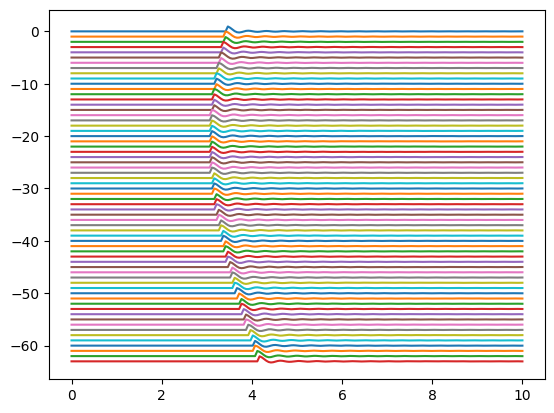

In [168]:
# Setup According to the data given
Nmics = 64
Nsamp = 200
C = 2.0
Obstacle_location = (3, -1)

# Time dilation factor for sinc pulse: how narrow
SincP = 5

# Setting the Mic and time_per_sample
mics = put_nmics(Nmics, pitch)
time_per_sample = dist_per_samp/C


t = np.linspace(0, Nsamp*time_per_sample, Nsamp)
# For printing all the mic outputs in one graph
offset = 0

# Setting up the output wave from the mic
y = []
for mic in range(Nmics):
  y_td = []
  td = dist(src, Obstacle_location, mics[mic])/C
  for i in range(len(t)):
    if t[i] < td:
      y_td.append(0)
    else:
      y_td.append(wsrc(t[i]-td, SincP))
  y_td = np.array(y_td)
  plt.plot(t, y_td+offset)
  offset -=1
  y.append(y_td)

### The Heatmap
- X axis tells the Nsamp
- Y axis the Mic No. starting from bottom as 0.

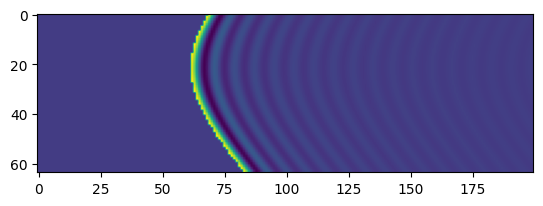

In [169]:
y = np.array(y)
plt.figure()
plt.imshow(y)
plt.show()

## Determining the Position of Obstacle Using DAS
- To find the obstacle location from the ouptuts of the mic we use DAS.
### Question
- Does it make sense to reconstruct up toNsamp? What value is more reasonable
as an upper limit for the x-axis here?
### Answer
- We need not need to set up the grid upto Nsamp we only need to go upto Nsamp/2 as the max t_delay a mic output can have is Nsamp * time_per_samp.
- Thus it can detect upto dist Nsamp*dist_per_samp/2 since the wave has to come back as well.


In [170]:
# Code to set up Grid or points where to check
X,Y = np.meshgrid(np.arange(Nsamp)*dist_per_samp/2, -1 * mics.transpose()[1])

- Code to Implement the DAS algorithm.

In [171]:
y3 = []
for i in range(len(X)):
  y2 = []
  for j in range(len(X[0])):
    # This will store the sum of outputs of all mics at their respective
    # time delays for a i,j
    y_value = 0
    for mic in range(Nmics):
      td2 = dist(src, [X[i][j], Y[i][j]], mics[mic])/C
      if int(td2 / time_per_sample) >= Nsamp:
        y_value += 0
      else:
        y_value += y[mic][int(td2/time_per_sample)]
    y2.append(y_value)
  y3.append(y2)
y5 = np.array(y3)

- Heatmap to get the position of the Obstacle.

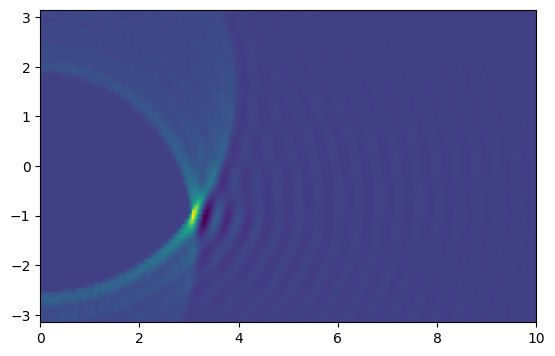

In [172]:
plt.imshow(y3, extent=[0,Nsamp*dist_per_samp/2,mics[0][1],mics[-1][1]])

## Questions
- The (x, y) coordinates corresponding to the maximum amplitude (yellow colour) is approximately
(30, 22). Explain why this is the correct expected position for the given obstacle.
- What is the maximum obstacle x- and y- coordinate that you can use and still have an image
reconstructed?
- What happens if C is different - if C is decreased it looks like the image becomes sharper. Can you
explain why intuitively?
- What happens if Nmics is increased or decreased? Do the experiments with Nmics = [8, 32, 64]
and Nsamp = [50, 100, 200] (all combinations). Attach the resulting images.

## Answers
1. 30 represents the No. of sample thus 30 * .1 represents 3 in the X axis. 22 represents the 23rd mic from the bottom, thus it has the coordinate near -1.
2. Max (X,Y) can be such that max(dist_delay) = sorce to obs + obs to Farthest mic is not greater than Nsamp*dis_per_samp.
3. If C is increased we get a larger interval of time for which the source is active which in turn results in a sharper image.
4. The Heaptmaps for the respective are present in the report. If Nmics is decreased we get less sharper image.


## Reconstruction From the Data Sets Given
- Here we are given the mic ouptuts doc and need to show the obstaacle location.
- I am attaching the images in the report but if you wanne see the ouptut here please ensure the files are uploaded.
- Just uncomment the last function call and replace the parameter in it with the file name to get the plot.

In [173]:
def recon(file):
  Nmics = 64
  Nsamp = 200
  pitch = 0.1
  dist_per_samp = 0.1
  C = 0.5

  # Please upload the file first if you want to check the plot
  y = np.loadtxt(file)

  mics = put_nmics(Nmics, pitch)
  time_per_sample = dist_per_samp/C

  t = np.linspace(0, Nsamp*time_per_sample, Nsamp)

  # Code to set up Grid or points where to check
  X,Y = np.meshgrid(np.arange(Nsamp)*dist_per_samp/2, -1 * mics.transpose()[1])

  y3 = []
  for i in range(len(X)):
    y2 = []
    for j in range(len(X[0])):
      # This will store the sum of outputs of all mics at their respective
      # time delays for a i,j
      y_value = 0
      for mic in range(Nmics):
        td2 = dist(src, [X[i][j], Y[i][j]], mics[mic])/C
        if int(td2 / time_per_sample) >= Nsamp:
          y_value += 0
        else:
          y_value += y[mic][int(td2/time_per_sample)]
      y2.append(y_value)
    y3.append(y2)
  y5 = np.array(y3)

  plt.imshow(y3, extent=[0,Nsamp*dist_per_samp/2,mics[0][1],mics[-1][1]])

#recon('rx2.txt')